## Practical Task

In [189]:
# Importing the csv file and creating a dataframe

import pandas as pd
import numpy as np

# Scaling modules
from mlxtend.preprocessing import minmax_scaling, standardize

# Plotting modules
import seaborn as sns
import matplotlib.pyplot as plt


titanic=pd.read_csv("Titanic.csv")

In [190]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [191]:
# get the number of missing data points per column
missing_values_count = titanic.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:8]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
dtype: int64

In [192]:
# Assessing the overal size of the data frame. 891 rows x 12 columns
titanic.shape

(891, 12)

In [193]:
# Examining the date types for each of the column inputs
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 1. What is the most important factor in determining survival of the Titanic incident?

Answer: I suspect Age, Gender and Cabin Class are the main factors. The code below will test this hypothesis.

In [194]:
# Storing the dataframe of the passengers that have survived the incident.
alive=titanic[titanic['Survived']==1]

no_survivors=alive['Survived'].sum()

print(f' The number of people who have survived the incident is: {no_survivors}')

#The age group that was most common amongs the survivors
age_group=alive['Age'].mode()
print(f' The most common age group of the surviving group is: {age_group}')

# #Printing the histogram of survived passengers age
# alive.hist(column='Age')



 The number of people who have survived the incident is: 342
 The most common age group of the surviving group is: 0    24.0
Name: Age, dtype: float64


In [195]:
survived = titanic.groupby(['Survived','Sex']).size()
print(survived)

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64


Sex
male      577
female    314
Name: count, dtype: int64

From the diagram below, we can see most of the passengers were males.


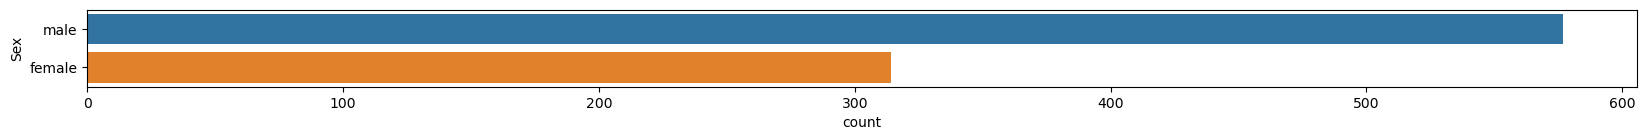

In [207]:
df_bin=titanic  #for discretised variables

fig=plt.figure(figsize=(20,1))
sns.countplot(y='Sex',data=df_bin);
print(df_bin.Sex.value_counts())
print("\nFrom the diagram below, we can see most of the passengers were males.")

In [197]:
#The gender group that was most common amongs the survivors
gender_group=alive['Sex'].mode()
no_female=alive[alive['Sex']=='female'].shape[0]
# no_male=alive[alive['Sex']=='male'].count()

print(f' The msot common gender of people who have survived the incident is: {gender_group}')
print(f'\n There were in total {no_female} females that have survived this incident out of {no_survivors} survivors.')
print(f'This represents {(no_female/no_survivors)*100}% of the survivors')


 The msot common gender of people who have survived the incident is: 0    female
Name: Sex, dtype: object

 There were in total 233 females that have survived this incident out of 342 survivors.
This represents 68.12865497076024% of the survivors


In [198]:
#The passenger class that was most common amongs the survivors
class_group=alive['Pclass'].mode()

first_class=alive[alive['Pclass']==1].shape[0]
second_class=alive[alive['Pclass']==2].shape[0]
third_class=alive[alive['Pclass']==3].shape[0]

print(f' The msot common passenger class of people who have survived the incident is: {class_group}')
print(f'\n Number of first class survivors: {first_class}')
print(f'\n Number of second class survivors: {second_class}')
print(f'\n Number of third class survivors: {third_class}')


 The msot common passenger class of people who have survived the incident is: 0    1
Name: Pclass, dtype: int64

 Number of first class survivors: 136

 Number of second class survivors: 87

 Number of third class survivors: 119


Conclusion from the above analysis seems to suggest gender and age plays a significant factor in the survival of the passengers, but the passenger class did not have appear to have the same effect. In fact we see third class passengers having a higher survival rate than second class passengers.

2. In the movie, the upper-class passengers were given preference on lifeboats. Does this show on data?

Answer: No, we do not have sufficient data for us to determine which passengers were on lifeboats.

In [199]:
survived_class = titanic.groupby(['Survived','Pclass']).size()
print(survived_class)

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64


3. "Women and children first". Was this the case?

In [200]:
survived_gender = titanic.groupby(['Survived','Sex']).size()
print(survived_gender)

survived_age = titanic.groupby(['Survived','Age']).size()
print(survived_age[8:])

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64
Survived  Age 
0         10.0    2
          11.0    3
          14.0    3
          14.5    1
          15.0    1
                 ..
1         58.0    3
          60.0    2
          62.0    2
          63.0    2
          80.0    1
Length: 134, dtype: int64


We know there were in total 342 passengers who have survived, out of which 233 were female and only 109 were males. Females were twice as likely to survive compared to males. However, we do not have sufficient data to confirm that the age group younger than 20 were children.

4. Add one other observation that you noted in the dataset.

In [201]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [202]:
# titanic['Fare'].max()
titanic[titanic['Fare']==0].count()

PassengerId    15
Survived       15
Pclass         15
Name           15
Sex            15
Age             7
SibSp          15
Parch          15
Ticket         15
Fare           15
Cabin           3
Embarked       15
dtype: int64

In [203]:
titanic[titanic['Fare']>500].count()

PassengerId    3
Survived       3
Pclass         3
Name           3
Sex            3
Age            3
SibSp          3
Parch          3
Ticket         3
Fare           3
Cabin          2
Embarked       3
dtype: int64

In [204]:
titanic[titanic['Fare']<100].count()

PassengerId    838
Survived       838
Pclass         838
Name           838
Sex            838
Age            666
SibSp          838
Parch          838
Ticket         838
Fare           838
Cabin          161
Embarked       836
dtype: int64

<Axes: xlabel='Fare Price', ylabel='No. of Passengers'>

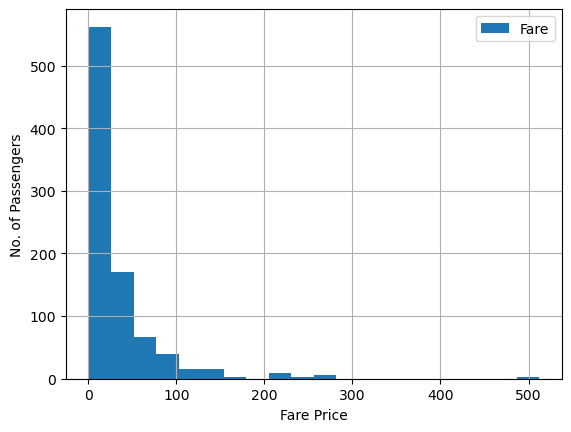

In [205]:
titanic.plot.hist(column="Fare",grid=True,bins=20,xlabel="Fare Price",ylabel="No. of Passengers")

From my analysis of the fare prices, I can see that there were 15 passengers that did not pay for the fare. The majority of the fare prices were under 100 (dollars?), there were only 3 passengers that have paid more than 500 (dollars?)